## Task API Image Classifier


In [ ]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 34.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training image shape:", x_train.shape) # (60000, 28, 28)
print("Training label shape:", y_train.shape) # (60000,)
print("First five training labels:", y_train[:5]) # array([50149], dtype=uint8)

11490434/11490434 [==============================] - 0s 0us/step
Training image shape: (60000, 28, 28)
Training label shape: (60000,)
First five training labels: [5 0 4 1 9]


In [ ]:
import autokeras as ak

Using TensorFlow backend


In [ ]:
# Initialize the image classifier
clf = ak.ImageClassifier(max_trials=2) # It tries two different models

# Feed the image classifier with training data
# 20% of the data is used as validation data by default for tuning
# the process may run for a bit long time, please try to use GPU.
clf.fit(x_train, y_train, epochs=3) # each model is trained for 3 epochs

Trial 2 Complete [00h 37m 45s]
val_loss: 5.642310619354248

Best val_loss So Far: 0.052708059549331665
Total elapsed time: 00h 38m 39s
Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1567 - accuracy: 0.9522
Epoch 2/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0724 - accuracy: 0.9776
Epoch 3/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0598 - accuracy: 0.9812


In [ ]:
test_loss, test_acc = clf.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: ", test_acc)
print("Test loss: ", test_loss)

Test accuracy:  0.9869999885559082
Test loss:  0.036679789423942566


In [ ]:
predicted_y = clf.predict(x_test)
print(predicted_y)

313/313 [==============================] - 1s 3ms/step
[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]


In [ ]:
best_model = clf.export_model()
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

In [ ]:
from tensorflow.keras.models import load_model

best_model.save("model_autokeras")

load_model = load_model("model_autokeras") # , custom_objects=ak.CUSTOM_OBJECTS

predicted_y = load_model.predict(tf.expand_dims(x_test, -1))
print(predicted_y)

test_loss, test_acc = clf.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step
[[4.14145607e-09 2.12387080e-10 1.38755809e-07 ... 9.99999046e-01
  4.92171326e-09 1.14613975e-07]
 [1.48451682e-05 4.07109241e-04 9.99149561e-01 ... 6.00069786e-11
  1.80039774e-06 1.26120570e-09]
 [2.93201428e-08 9.99945283e-01 2.15244586e-06 ... 1.22185684e-05
  1.70545673e-06 3.21108580e-08]
 ...
 [4.81312872e-11 5.65217606e-09 3.06591245e-11 ... 9.37672894e-07
  9.02581087e-06 2.40444979e-06]
 [7.16390005e-08 2.05398858e-11 1.42722067e-09 ... 4.47330423e-10
  1.85143690e-05 1.35020466e-08]
 [1.69389253e-07 7.12377293e-12 4.43850894e-07 ... 2.55578089e-12
  1.07922851e-07 2.27551333e-09]]
Test accuracy:  0.9869999885559082


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

clf = ak.ImageClassifier(
    max_trials=2,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    objective='val_accuracy'
)

clf.fit(x_train[:6000, :, :],
        y_train[:6000,],
        validation_split=0.15,
        epochs=3,
        verbose=2)

Epoch 1/3


188/188 - 94s - loss: 0.6813 - accuracy: 0.8082 - 94s/epoch - 502ms/step
Epoch 2/3
188/188 - 83s - loss: 0.2717 - accuracy: 0.9283 - 83s/epoch - 439ms/step
Epoch 3/3
188/188 - 83s - loss: 0.1687 - accuracy: 0.9512 - 83s/epoch - 440ms/step


In [ ]:
import keras_tuner

def my_metric(y_true, y_pred):
  correct_labels = tf.cast(y_true==y_pred, tf.float32)
  return tf.reduce_mean(correct_labels, axis=-1)

clf = ak.ImageClassifier(

      seed=42,
      max_trials=2,
      loss='categorical_crossentropy',

      # Wrap the function into a Keras Tunner Objective
      # and pass it to Keras,
      # Direction can be 'min' or 'max'
      # meaning we want to minimize or maximize the metric.
      # 'val_my_metric' is just add a 'val_' prefix
      # to the function name or the metric name.
      objective = keras_tuner.Objective("val_my_metric", direction="max"),
      # Include it as one of the metrics
      metrics = [my_metric]

)

clf.fit(x_train, y_train, validation_split=0.15, epochs=3)

Epoch 1/3


 164/1875 [=>............................] - ETA: 12:56 - loss: 0.6806 - my_metric: 0.0000e+00

## Task API TaskClassifier

In [ ]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 114.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 41.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0

In [ ]:
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


In [ ]:
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load 20newsgroup dataset

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [ ]:
categories = ["rec.autos", "rec.motorcycles"]

In [ ]:
news_train = fetch_20newsgroups(
    subset="train", shuffle=True, random_state=42, categories=categories
)

news_test = fetch_20newsgroups(
    subset="test", shuffle=True, random_state=42, categories=categories
)

doc_train, label_train = np.array(news_train.data), np.array(news_train.target)
doc_test, label_test = np.array(news_test.data), np.array(news_test.target)

In [ ]:
print(

      "Unique labels {}. \nNumber of unique labels: {}.\n\n".format(
          np.unique(label_train), len(np.unique(label_train))
      )
)



print("The number of documents for training: {}.".format(len(doc_train)))
print("The number of documents for testing: {}.".format(len(doc_test)))

type(doc_train[0]), doc_train[0]

Unique labels [0 1]. 
Number of unique labels: 2.


The number of documents for training: 1192.
The number of documents for testing: 794.


(numpy.str_,
 'From: gregl@zimmer.CSUFresno.EDU (Greg Lewis)\nSubject: Re: WARNING.....(please read)...\nKeywords: BRICK, TRUCK, DANGER\nNntp-Posting-Host: zimmer.csufresno.edu\nOrganization: CSU Fresno\nLines: 33\n\nIn article <1qh336INNfl5@CS.UTK.EDU> larose@austin.cs.utk.edu (Brian LaRose) writes:\n>This just a warning to EVERYBODY on the net.  Watch out for\n>folks standing NEXT to the road or on overpasses.   They can\n>cause SERIOUS HARM to you and your car.  \n>\n>(just a cliff-notes version of my story follows)\n>\n>10pm last night, I was travelling on the interstate here in\n>knoxville,  I was taking an offramp exit to another interstate\n>and my wife suddenly screamed and something LARGE hit the side\n>of my truck.  We slowed down, but after looking back to see the\n>vandals standing there, we drove on to the police station.\n>\n>She did get a good look at the guy and saw him "cock his arm" with\n>something the size of a cinderblock, BUT I never saw him. We are \n>VERY lucky 

## Run Text Classifier

In [ ]:
# Initialize the text classifier
clf = ak.TextClassifier(
    max_trials=2, overwrite=True
) # It tries 3 different models. overwrite the previous history

clf.fit(doc_train, label_train, verbose=2)

Trial 2 Complete [00h 00m 27s]
val_loss: 0.1865968257188797

Best val_loss So Far: 0.03198597580194473
Total elapsed time: 00h 00m 54s
Epoch 1/16
38/38 - 1s - loss: 0.6982 - accuracy: 0.4866 - 1s/epoch - 30ms/step
Epoch 2/16
38/38 - 0s - loss: 0.6758 - accuracy: 0.6049 - 337ms/epoch - 9ms/step
Epoch 3/16
38/38 - 0s - loss: 0.3970 - accuracy: 0.8742 - 337ms/epoch - 9ms/step
Epoch 4/16
38/38 - 0s - loss: 0.0896 - accuracy: 0.9748 - 337ms/epoch - 9ms/step
Epoch 5/16
38/38 - 0s - loss: 0.0141 - accuracy: 0.9983 - 345ms/epoch - 9ms/step
Epoch 6/16
38/38 - 0s - loss: 0.0070 - accuracy: 0.9992 - 492ms/epoch - 13ms/step
Epoch 7/16
38/38 - 0s - loss: 0.0043 - accuracy: 0.9992 - 428ms/epoch - 11ms/step
Epoch 8/16
38/38 - 0s - loss: 0.0030 - accuracy: 0.9992 - 421ms/epoch - 11ms/step
Epoch 9/16
38/38 - 0s - loss: 0.0031 - accuracy: 0.9983 - 368ms/epoch - 10ms/step
Epoch 10/16
38/38 - 0s - loss: 0.0027 - accuracy: 0.9992 - 424ms/epoch - 11ms/step
Epoch 11/16
38/38 - 0s - loss: 0.0018 - accuracy: 0

In [ ]:
test_loss, test_acc = clf.evaluate(doc_test, label_test, verbose=0)
print(f"Test accuracy: {test_acc}.")

Test accuracy: 0.9634760618209839.


# Task API Structured Data Classifier

In [ ]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

13049/13049 [==============================] - 0s 0us/step


### Run `StructuredDataClassifier` API

In [ ]:
import autokeras as ak

# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(max_trials=10) # Try 10 different pipelines

# Feed the structured data classifier with training data
clf.fit(
    train_file_path,
    #The name of the label column
    "survived",
    verbose=2
)


Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.8695651888847351

Best val_accuracy So Far: 0.8782608509063721
Total elapsed time: 00h 01m 39s
Epoch 1/3
20/20 - 1s - loss: 0.6507 - accuracy: 0.6268 - 587ms/epoch - 29ms/step
Epoch 2/3
20/20 - 0s - loss: 0.5380 - accuracy: 0.7831 - 76ms/epoch - 4ms/step
Epoch 3/3
20/20 - 0s - loss: 0.4716 - accuracy: 0.8118 - 73ms/epoch - 4ms/step


In [ ]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(

      column_names= [
        "sex",
        "age",
        "n_siblings_spouses",
        "parch",
        "fare",
        "class",
        "deck",
        "embark_town",
        "alone",
    ],
      column_types = {"sex":"categorical", "fare":"numerical"},
      max_trials=10) # Try 10 different pipelines

# Feed the structured data classifier with training data
clf.fit(
    train_file_path,
    #The name of the label column
    "survived",
    verbose=2
)

Epoch 1/3
20/20 - 1s - loss: 0.6661 - accuracy: 0.6156 - 692ms/epoch - 35ms/step
Epoch 2/3
20/20 - 0s - loss: 0.5711 - accuracy: 0.7368 - 81ms/epoch - 4ms/step
Epoch 3/3
20/20 - 0s - loss: 0.5119 - accuracy: 0.7895 - 82ms/epoch - 4ms/step


### Predict with Best Models

In [ ]:
predicted_y = clf.predict(test_file_path)
print(predicted_y[:5])

9/9 [==============================] - 0s 4ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Evaluate the Best Pipeline wit testing.csv file.

In [ ]:
test_loss, test_acc = clf.evaluate(test_file_path, "survived", verbose=0)
print("Test accuracy: ", test_acc)

Test accuracy:  0.7537878751754761


# Task API Structured Data Regressor

### Load California housing price prediction dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()

# Import pandas package to format the data
import pandas as pd

# Extract features with their names into a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MEDV
target = pd.Series(house_dataset.target, name="MEDV")

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [ ]:
# Check the shape of whole dataset and the splited training and test set
print(f"--Shape of the whole data--\n {data.shape}.")
print(f"\n--Shape of the target vector--\n {target.shape}")
print(f"\n--Shape of the training data--\n {train_data.shape}")
print(f"\n--Shape of the testing data--\n {test_data.shape}")

--Shape of the whole data--
 (20640, 8).

--Shape of the target vector--
 (20640,)

--Shape of the training data--
 (16512, 8)

--Shape of the testing data--
 (4128, 8)


### Run the Structured Data Regressor

In [ ]:
import autokeras as ak

regressor = ak.StructuredDataRegressor(max_trials=10, overwrite=True)
regressor.fit(x=train_data, y=train_targets, batch_size=1024)

Trial 10 Complete [00h 01m 01s]
val_loss: 0.5806052684783936

Best val_loss So Far: 0.28197646141052246
Total elapsed time: 00h 18m 12s
Epoch 1/321
17/17 [==============================] - 1s 16ms/step - loss: 2.7328 - mean_squared_error: 2.7328
Epoch 2/321
17/17 [==============================] - 0s 13ms/step - loss: 1.1054 - mean_squared_error: 1.1054
Epoch 3/321
17/17 [==============================] - 0s 17ms/step - loss: 0.8638 - mean_squared_error: 0.8638
Epoch 4/321
17/17 [==============================] - 0s 15ms/step - loss: 0.7399 - mean_squared_error: 0.7399
Epoch 5/321
17/17 [==============================] - 0s 14ms/step - loss: 0.6579 - mean_squared_error: 0.6579
Epoch 6/321
17/17 [==============================] - 0s 16ms/step - loss: 0.5968 - mean_squared_error: 0.5968
Epoch 7/321
17/17 [==============================] - 0s 16ms/step - loss: 0.5621 - mean_squared_error: 0.5621
Epoch 8/321
17/17 [==============================] - 0s 15ms/step - loss: 0.5340 - mean_square

### Run the Structured Data Regressor

In [ ]:
predicted_y = regressor.predict(test_data)
print(predicted_y)

129/129 [==============================] - 0s 3ms/step
[[0.61664945]
 [1.3705221 ]
 [4.8575816 ]
 ...
 [4.8779383 ]
 [0.8400544 ]
 [1.7991643 ]]


### Evaluate the best model on the test data

In [ ]:
test_loss, test_mse = regressor.evaluate(test_data, test_targets, verbose=0)
print(f"Test MSE: {test_mse}")

Test MSE: 0.2625906765460968


# Task API Multi Label

In [1]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:

In [1]:
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


### Create synthetic multi-label dataset

In [6]:
from sklearn.datasets import make_multilabel_classification

X, Y = make_multilabel_classification(
    n_samples = 100,
    n_features = 64,
    n_classes = 3,
    n_labels = 2,
    allow_unlabeled=False,
    random_state = 1,
)

X = X.reshape((100, 8, 8))
X.shape, Y.shape

((100, 8, 8), (100, 3))

In [7]:
x_train, x_test, y_train, y_test = X[:80], X[:80], Y[:80], Y[80:]

### Run the ImageClassifier for multi-label information

In [8]:
# Initialize the image classifier
clf = ak.ImageClassifier(
    max_trials = 10,
    multi_label = True,
    overwrite = True,)
    # It tries two different pipelines



# Feed the image classifier with training data
# 20% of the data is used as validation data by default of training
# the process may run for a bit long time, please try to use GPU

clf.fit(x_train, y_train, epochs=3, verbose=2) # each model is trained for three epochs




Trial 10 Complete [00h 00m 02s]
val_loss: 0.7420747876167297

Best val_loss So Far: 0.5837531089782715
Total elapsed time: 00h 04m 33s
Epoch 1/3
3/3 - 1s - loss: 0.6876 - accuracy: 0.1875 - 589ms/epoch - 196ms/step
Epoch 2/3
3/3 - 0s - loss: 0.5918 - accuracy: 0.2750 - 17ms/epoch - 6ms/step
Epoch 3/3
3/3 - 0s - loss: 0.5562 - accuracy: 0.2875 - 17ms/epoch - 6ms/step


### Predict with the best model

In [9]:
predicted_y = clf.predict(x_test)

print("The prediction shape is {}".format(predicted_y))
print("The predicted labels of the first five instances are: \n {}".format(
    predicted_y[:5, :]
))

3/3 [==============================] - 0s 4ms/step
The prediction shape is [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

In [11]:
test_loss, test_acc = clf.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy {test_acc}")

InvalidArgumentError: ignored

In [13]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training image shape: ", x_train.shape )
print("Training label shape: ", y_train.shape )
print("First five training labels: ", y_train[:5] )

11490434/11490434 [==============================] - 0s 0us/step
Training image shape:  (60000, 28, 28)
Training label shape:  (60000,)
First five training labels:  [5 0 4 1 9]


### IO API for image classification

In [14]:
import autokeras as ak

# Initialize the IO API
io_model = ak.AutoModel(
    inputs = ak.ImageInput(),
    outputs = ak.ClassificationHead(
        loss="categorical_crossentropy", metrics=['accuracy']
    ),
    objective= "val_loss",
    tuner = "random",
    max_trials = 3,
    overwrite=True
)

# Fit the modek with prepared data
# Use the first 100 training samples for 1 each as a quick demo
# You may run with full dataset with 10 epochs, but expect a longer training time.
io_model.fit(x_train[:100], y_train[:100], epochs=1)


Trial 3 Complete [00h 00m 05s]
val_loss: 6.629319190979004

Best val_loss So Far: 2.2996838092803955
Total elapsed time: 00h 03m 06s


4/4 [==============================] - 18s 397ms/step - loss: 2.6325 - accuracy: 0.1100


### Get the summarized results during the tuning process (return the 10 best models if existed)

In [15]:
io_model.tuner.results_summary()

Results summary
Results in ./auto_model
Showing 10 best trials
Trial summary
Hyperparameters:
image_block_1/normalize: False
image_block_1/augment: False
image_block_1/block_type: efficient
classification_head_1/spatial_reduction_1/reduction_type: global_max
classification_head_1/dropout: 0.25
optimizer: adam
learning_rate: 0.0001
image_block_1/efficient_net_block_1/pretrained: False
image_block_1/efficient_net_block_1/version: b0
image_block_1/efficient_net_block_1/imagenet_size: False
Score: 2.2996838092803955
Trial summary
Hyperparameters:
image_block_1/normalize: False
image_block_1/augment: False
image_block_1/block_type: efficient
classification_head_1/spatial_reduction_1/reduction_type: global_avg
classification_head_1/dropout: 0.5
optimizer: adam_weight_decay
learning_rate: 2e-05
image_block_1/efficient_net_block_1/pretrained: False
image_block_1/efficient_net_block_1/version: b4
image_block_1/efficient_net_block_1/imagenet_size: False
Score: 2.3038272857666016
Trial summary
Hy

### Retrieve best model

In [16]:
best_model = io_model.export_model()
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 cast_to_float32 (CastToFloat32  (None, 28, 28)      0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 28, 28, 1)   0           ['cast_to_float32[0][0]']        
 )                                                                                                
                                                                                              

### Predict the best model

In [18]:
predicted_y = io_model.predict(x_test[:100])
print(predicted_y)

4/4 [==============================] - 0s 14ms/step
[['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']
 ['9']]


### Evaluate the best model on the test data

In [23]:
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print("Test accruacy: ", test_acc)

ValueError: ignored

In [19]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [1]:
!pip install -r https://raw.githubusercontent.com/datamllab/automl-in-action-notebooks/master/requirements.txt

In [2]:
import tensorflow as tf

### Create synthetic image - attributes dataset

In [21]:
import numpy as np

num_instances = 100

# Generate image data
image_data = np.random.rand(num_instances, 32, 32, 3).astype(np.float32)
image_train, image_test = image_data[:80], image_data[80:]

# Generated Structured Data
structured_data = np.random.rand(num_instances, 20).astype(np.float32)
structured_train, structured_test = structured_data[:80], structured_data[80:]

# Generate classification labels of five classes
classification_target = np.random.randint(5, size=num_instances)
target_train, target_test = classification_target[:80], classification_target[80:]

In [22]:
import autokeras as ak

### IO API for Multi-Input Learning

In [19]:
# Initialize the IO API
multi_input_learner = ak.AutoModel(
    inputs = [ak.ImageInput(), ak.StructuredDataInput()],
    outputs = ak.ClassificationHead(),
    max_trials=3,
    overwrite=True,
    project_name = 'io_api_multimodal',
)

# Fit the model with prepared data
multi_input_learner.fit(
    [image_train, structured_train], target_train, epochs=10, verbose=2
)

Trial 3 Complete [00h 00m 39s]
val_loss: 1.6263277530670166

Best val_loss So Far: 1.5648671388626099
Total elapsed time: 00h 02m 04s
Epoch 1/10
3/3 - 7s - loss: 3.1313 - accuracy: 0.2125 - 7s/epoch - 2s/step
Epoch 2/10
3/3 - 0s - loss: 3.3480 - accuracy: 0.3500 - 148ms/epoch - 49ms/step
Epoch 3/10
3/3 - 0s - loss: 2.8844 - accuracy: 0.5625 - 138ms/epoch - 46ms/step
Epoch 4/10
3/3 - 0s - loss: 2.4635 - accuracy: 0.6125 - 135ms/epoch - 45ms/step
Epoch 5/10
3/3 - 0s - loss: 1.3506 - accuracy: 0.8125 - 133ms/epoch - 44ms/step
Epoch 6/10
3/3 - 0s - loss: 0.6007 - accuracy: 0.8500 - 128ms/epoch - 43ms/step
Epoch 7/10
3/3 - 0s - loss: 0.4200 - accuracy: 0.9125 - 145ms/epoch - 48ms/step
Epoch 8/10
3/3 - 0s - loss: 0.5300 - accuracy: 0.9000 - 133ms/epoch - 44ms/step
Epoch 9/10
3/3 - 0s - loss: 0.3112 - accuracy: 0.9375 - 128ms/epoch - 43ms/step
Epoch 10/10
3/3 - 0s - loss: 0.6285 - accuracy: 0.8500 - 131ms/epoch - 44ms/step


In [23]:
test_loss, test_acc = multi_input_learner.evaluate(
    [image_test, structured_test], target_test, verbose=0
)


print(f"Test accuracy: {test_acc}")

Test accuracy: 0.4000000059604645


In [9]:
import tensorflow as tf

### Create synthetic image - attributes dataset

In [10]:
import numpy as np

num_instances = 100

num_instances = 100

# Generate image data
image_data = np.random.rand(num_instances, 32, 32, 3).astype(np.float32)
image_train, image_test = image_data[:80], image_data[80:]

# Generated Structured Data
structured_data = np.random.rand(num_instances, 20).astype(np.float32)
structured_train, structred_test = structured_data[:80], structured_data[80:]

# Generate classification labels of five classes
classification_target = np.random.randint(5, size=num_instances)
clf_target_train, clf_target_test = (
    classification_target[:80],
    classification_target[80:]
)

# Generate regression targets
regression_target = np.random.rand(num_instances, 1).astype(np.float32)
reg_target_train, reg_target_test = regression_target[:80], regression_target[80:]


### IO API for mult-task learning

In [11]:
# Initialize the IO API
multi_output_learner = ak.AutoModel(
    inputs = [ak.ImageInput(), ak.StructuredDataInput()],
    outputs = [ak.ClassificationHead(), ak.RegressionHead()],
    max_trials = 3,
    overwrite = True,
    project_name = 'io_api_multitask',
)

# Fit the model with the prepared data
multi_output_learner.fit(
    [image_train, structured_train],
    [clf_target_train, reg_target_train],
    epochs = 10,
    verbose = 2,
)



Trial 3 Complete [00h 00m 34s]
val_loss: 1.936217188835144

Best val_loss So Far: 1.782381296157837
Total elapsed time: 00h 03m 26s
Epoch 1/10
3/3 - 15s - loss: 3.5184 - classification_head_1_loss: 1.8734 - regression_head_1_loss: 1.6449 - classification_head_1_accuracy: 0.2875 - regression_head_1_mean_squared_error: 1.6449 - 15s/epoch - 5s/step
Epoch 2/10
3/3 - 0s - loss: 4.7008 - classification_head_1_loss: 1.5569 - regression_head_1_loss: 3.1439 - classification_head_1_accuracy: 0.4000 - regression_head_1_mean_squared_error: 3.1439 - 182ms/epoch - 61ms/step
Epoch 3/10
3/3 - 0s - loss: 7.1201 - classification_head_1_loss: 1.2818 - regression_head_1_loss: 5.8383 - classification_head_1_accuracy: 0.4625 - regression_head_1_mean_squared_error: 5.8383 - 181ms/epoch - 60ms/step
Epoch 4/10
3/3 - 0s - loss: 8.6825 - classification_head_1_loss: 0.9999 - regression_head_1_loss: 7.6826 - classification_head_1_accuracy: 0.6125 - regression_head_1_mean_squared_error: 7.6826 - 181ms/epoch - 60ms/

### Retrieve Best Model

In [12]:
best_model = multi_output_learner.export_model()
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 20)]         0           []                               
                                                                                                  
 multi_category_encoding (Multi  (None, 20)          0           ['input_2[0][0]']                
 CategoryEncoding)                                                                                
                                                                                                  
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           672         ['multi_category_encoding[0][

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.788104 to fit



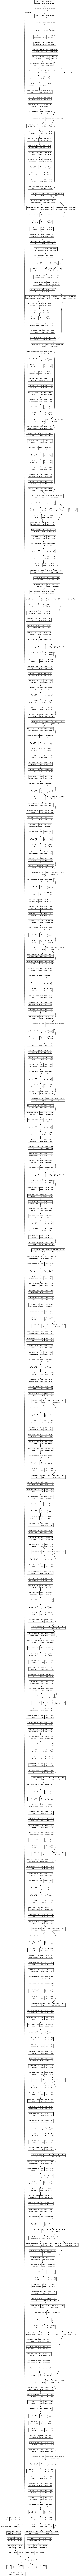

In [13]:
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True)